# Credit Card Detection

Neste projeto iremos realizar detecção de fraudes em cartões de crédito. Os dados podem ser obtidos no dataset do kaggle: [Credit Card Fraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)


# Importando dados e bibliotecas


## Importando principais bibliotecas e os dados


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Importando dados
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataset["Time"] = dataset["Time"].apply(lambda x:(x/3600)%24)

In [4]:
feature_names = np.array(dataset.columns)
n_input_features = len(feature_names) - 1
print(", ".join(feature_names))

Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class


## Balanceando os dados e amostragem estratificada

Aqui realizamos uma amostragem estratificada através do método SMOTE e em seguida balanceamos as classes.

A divisão de treino, teste e validação foi de 70%, 30% e 0%, respectivamente.

Realizaremos a reamostragem somente da classe minoritária e além disso a amostragem dos dados de treino serão treinados separadamente dos dados de teste em uma instância `sm_train` da classe `SMOTE` do pacote `imblearn.over_sampling`.


In [5]:
from imblearn.over_sampling import SMOTE



# Armazenando em numpy array's os dados
X = dataset.values[:,:-1]
y = dataset.values[:,-1:]



# Número de exemplos
n_examples = len(y)


# Separando os dados de não-fraude e os de fraude
# nf significa não-fraude
X_nf = X[y.reshape(-1) == 0,:]
y_nf = y[y.ravel() == 0]
n_examples_nf = len(y_nf)

# Embaralhando os dados
np.random.seed(43)
index_shuffling_nf = list(range(n_examples_nf))
np.random.shuffle(index_shuffling_nf)
np.random.seed(None)

X_nf,y_nf = X_nf[index_shuffling_nf,:],y_nf[index_shuffling_nf,:]


# Definindo os tamanhos dos dados de treino, teste e validação para não-fraude
# A divisão ficará 70%-30%-0%
train_size_nf = int(n_examples_nf*0.7)
test_size_nf = n_examples_nf - train_size_nf


# Separando em dados de treino-teste-validação
X_nf_train,y_nf_train = X_nf[:train_size_nf],y_nf[:train_size_nf]
X_nf_test,y_nf_test = X_nf[train_size_nf:],y_nf[train_size_nf:]




# Separando os dados de não-fraude e os de fraude
# f significa fraude
X_f = X[y.reshape(-1) == 1,:]
y_f = y[y.ravel() == 1]
n_examples_f = len(y_f)


# Embaralhando os dados
np.random.seed(42)
index_shuffling_f = list(range(n_examples_f))
np.random.shuffle(index_shuffling_f)
np.random.seed(None)

X_f,y_f = X_f[index_shuffling_f,:],y_f[index_shuffling_f,:]


# Definindo os tamanhos dos dados de treino, teste e validação para fraude
# A divisão ficará 70%-30%-0%
train_size_f = int(n_examples_f*0.7)
test_size_f = n_examples_f - train_size_f


# Separando em dados de treino-teste-validação
X_f_train,y_f_train = X_f[:train_size_f],y_f[:train_size_f]
X_f_test,y_f_test = X_f[train_size_f:],y_f[train_size_f:]




# Concatenando os dados rebalanceados

X_train = np.concatenate((X_f_train,X_nf_train),axis=0)
y_train = np.concatenate((y_f_train,y_nf_train),axis=0)


X_test = np.concatenate((X_nf_test,X_f_test),axis=0)
y_test = np.concatenate((y_nf_test,y_f_test),axis=0)




# Rebalanceando os dados de treino e validação
sm_train = SMOTE(sampling_strategy='minority',random_state=42)

X_train,y_train = sm_train.fit_resample(X_train,y_train)

# Definindo os tamanhos de treino, teste e validação novamente
train_size = len(y_train)
test_size = len(y_test)
n_examples = train_size + test_size 

# Embaralhando novamente os dados de treino e validação
np.random.seed(101)
index_shuffling_train = list(range(train_size))
np.random.shuffle(index_shuffling_train)
np.random.seed(None)

X_train,y_train = X_train[index_shuffling_train],y_train[index_shuffling_train]

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Mudança de escala para facilitar o treinamento
sc_y = MinMaxScaler()

X_train_sc = sc_y.fit_transform(X_train)
X_test_sc = sc_y.transform(X_test)

# Modelos de Classificação

Nesta primeira abordagem utilizaremos modelos simples para previsão de fraudes, escolhidos através de validação cruzada com escolha aleatória dos hiperparâmetros, com a classe `RandomizedSearchCV()` do `sklearn.model_selection`.

Utilizamos a classe `SGDClassifier` do pacote `sklearn` para classificar os dados. Basicamente este modelo realiza a previsão das classe com classificadores lineares, treinando com métodos estocásticos. Esta classe possui os seguintes hiperparâmetros:

- `alpha`: este é um parâmetro de regularização que controla o peso das penalidades. A distribuição utilizada na escolha aleatória deste hiperparâmetro é `loguniform(1e-4,1e1)`.

- `penalty`: este é um parâmetro de regularização que controla o tipo de penalidade. Os hiperparâmetros escolhidos com probabilidade uniforme são `('l1','l2')`.

- `loss`: este é um parâmetro que controla o tipo de classificação. Aqui essencialmente utilizaremos dois parâmetros para definir modelos separados, que são os seguintes:

  - `'hinge'`: este tipo de _loss_ define o modelo SVM estocástico. Ou seja, estamos de certa forma tentando maximizar a separação entre as classes, porém por ser estocástico tem a vantagem de possuir um treinamento mais rápido e também ser menos propenso à _overfitting_, pelo fato de que não utilizar todos os dados de treino ao mesmo tempo.

  - `'log'`: este tipo de _loss_ define o modelo de regressão logística com treinamento estocástico. Neste caso o treinamento tenta deixar as distribuições de probabilidades preditas mais próximas aos valores reais.


In [7]:
# Save performance
import json


# Distribuições
from scipy.stats import loguniform


# Modelos
from sklearn.linear_model import SGDClassifier

# Métricas
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Barra de progresso
from tqdm import tqdm

# Seleção de modelos
from sklearn.model_selection import RandomizedSearchCV


# Espaço das distribuições de parâmetros
space = {}

# Modelos utilizados
models = {}


sgd = SGDClassifier

# Distribuição SVM
distributions = dict(loss=('hinge',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD SVM':distributions})

models.update({'SGD SVM':sgd})




# Distribuição Logistica
distributions = dict(loss=('log',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD LR':distributions})

models.update({'SGD LR':sgd})






# Nomes dos classificadores
classifiers_names = list(models.keys())




# Dicionarios de modelos, resultados e parâmetros
Best_model = {}
Results = {}
Best_params = {}


np.random.seed(42)
############ Model Loop ################
for s in tqdm(classifiers_names):
    print(f'\n{s}')
    # Classificador
    clf = models[s]
    # RandomizedSearchCV
    randomized_search = RandomizedSearchCV(clf(),param_distributions=space[s],n_iter=15,random_state=42,scoring='balanced_accuracy')
    # Encontrando os melhores parâmetros
    randomized_search.fit(X_train_sc,y_train.ravel())
    # Melhor desempenho na validação cruzada
    cv_score = randomized_search.best_score_
    # Melhores hiperparâmetros (segundo a validação cruzada)
    best_params = randomized_search.best_params_
    Best_params.update({s:best_params})
    # Melhor classificador (segundo a validação cruzada)
    best_model_ = randomized_search.best_estimator_
    # Previsão dos dados de teste
    y_pred = best_model_.predict(X_test_sc)
    Best_model.update({s:best_model_})
    # Resultados dos dados de teste
    Results.update({f'{s} Test':{'CV_score':cv_score,
                    'Precisão Balanceada':balanced_accuracy_score(y_test.reshape(-1),y_pred.reshape(-1)),
                    'Recall Classe 0':recall_score(y_test.reshape(-1),y_pred.reshape(-1),pos_label=0.),
                    'Recall Classe 1':recall_score(y_test.reshape(-1),y_pred.reshape(-1),pos_label=1.),
                    'Classification Report':classification_report(y_test.reshape(-1),y_pred.reshape(-1),digits=4,output_dict=True),
                    'Matriz de Confusão':confusion_matrix(y_test.reshape(-1),y_pred.reshape(-1),labels=[0.,1.]).tolist()}})
np.random.seed(None)
with open("performance/performance_supervised.json","w",encoding='utf-8') as f:
    json.dump(Results,f)
with open("performance/hyperparams.json","w",encoding='utf-8') as f:
    json.dump(Best_params,f)

  0%|          | 0/2 [00:00<?, ?it/s]


SGD SVM


 50%|█████     | 1/2 [01:07<01:07, 67.51s/it]


SGD LR


100%|██████████| 2/2 [02:10<00:00, 65.21s/it]



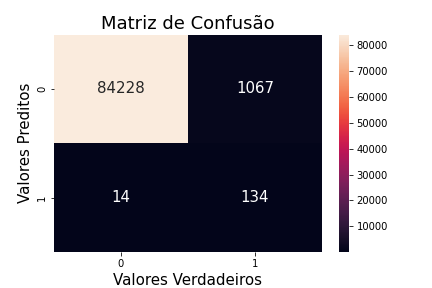
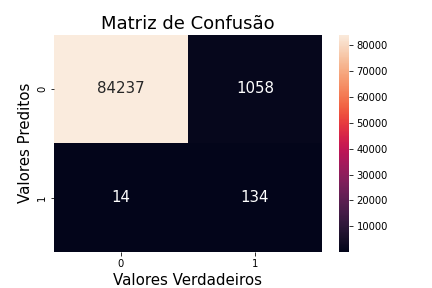

In [8]:
from IPython.core.display import HTML
import base64
from io import BytesIO
html = '''
<h1>Desempenho dos Modelos</h1>
'''

for model in models.keys():
    # Melhor modelo
    best_model_ = Best_model[model]
    html += f'<h2>{model}</h2>'

    # Apresentando o desempenho nos dados de validação e teste
    val_test = ('Test',)
    n_cols = len(val_test)
    for sufix in val_test:
      html += '\n<div>\n'
      html += f'<h3>{sufix}:</h3>\n'
      results_dict = Results[f"{model} {sufix}"]
      html += '<p>Precisão Balanceada: {:1.4f}</p>\n'.format(results_dict['Precisão Balanceada'])
      html += '<p>Recall Classe 0: {:1.4f}</p>\n'.format(results_dict['Recall Classe 0'])
      html += '<p>Recall Classe 1: {:1.4f}</p>\n'.format(results_dict['Recall Classe 1'])
      html += '<p>Matriz de Confusão:</p>\n'

      fig = plt.figure()
      ax = plt.gca()
      sns.heatmap(np.array(results_dict['Matriz de Confusão']),annot=True,fmt='d',ax=ax,annot_kws={"size":15})
      ax.set_title('Matriz de Confusão',fontsize=18)
      ax.set_xlabel('Valores Verdadeiros',fontsize=15)
      ax.set_ylabel('Valores Preditos',fontsize=15)
      fig.patch.set_alpha(1.0)
      
      tmpfile = BytesIO()
      fig.savefig(tmpfile)
      encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
      html += '\n<img src=\'data:image/png;base64,{}\'>\n'.format(encoded)
      html += '\n</div>\n'
plt.close("all")
display(HTML(html))
with open('performance/html_performance_test1.html','w',encoding='utf-8') as f:
  f.write(html)

# Selecionando Variáveis

Aqui utilizaremos algumas técnicas para filtrar as principais variáveis a fim de melhorar o desempenho.

## Filtro de F-test

Neste filtro utilizaremos ANOVA F-Test para cada uma das variáveis e iremos extrair as variáveis com maiores valores p.

In [9]:
from sklearn.feature_selection import f_classif


_,pvalues = f_classif(X_train_sc,y_train.ravel())

In [10]:
palette = [(0.647289504036909, 0.803921568627451, 0.8920415224913495),
 (0.6297466491667663, 0.7917957284333612, 0.8859197390923915),
 (0.6122037942966234, 0.7796698882392714, 0.8797979556934336),
 (0.5946609394264807, 0.7675440480451816, 0.8736761722944756),
 (0.5771180845563378, 0.7554182078510918, 0.8675543888955176),
 (0.5595752296861951, 0.743292367657002, 0.8614326054965598),
 (0.5420323748160523, 0.7311665274629122, 0.8553108220976018),
 (0.5244895199459095, 0.7190406872688223, 0.8491890386986438),
 (0.5069466650757667, 0.7069148470747325, 0.8430672552996858),
 (0.48940381020562396, 0.6947890068806427, 0.8369454719007279),
 (0.4718609553354811, 0.6826631666865529, 0.8308236885017699),
 (0.4543181004653384, 0.6705373264924631, 0.8247019051028119),
 (0.4367752455951956, 0.6584114862983733, 0.818580121703854),
 (0.4192323907250528, 0.6462856461042835, 0.812458338304896),
 (0.40168953585491, 0.6341598059101937, 0.806336554905938),
 (0.38414668098476723, 0.6220339657161038, 0.8002147715069801),
 (0.36660382611462444, 0.609908125522014, 0.7940929881080222),
 (0.34906097124448165, 0.5977822853279242, 0.7879712047090642),
 (0.33151811637433887, 0.5856564451338344, 0.7818494213101063),
 (0.3139752615041961, 0.5735306049397446, 0.7757276379111483),
 (0.2964324066340533, 0.5614047647456548, 0.7696058545121903),
 (0.2788895517639105, 0.549278924551565, 0.7634840711132324),
 (0.2613466968937677, 0.5371530843574752, 0.7573622877142744),
 (0.24380384202362493, 0.5250272441633854, 0.7512405043153164),
 (0.2262609871534822, 0.5129014039692956, 0.7451187209163586),
 (0.2087181322833394, 0.5007755637752058, 0.7389969375174006),
 (0.19117527741319662, 0.48864972358111597, 0.7328751541184426),
 (0.17363242254305383, 0.47652388338702617, 0.7267533707194846),
 (0.15608956767291104, 0.46439804319293637, 0.7206315873205267),
 (0.13854671280276817, 0.4522722029988466, 0.7145098039215687)]
custom_palette = sns.color_palette(palette)

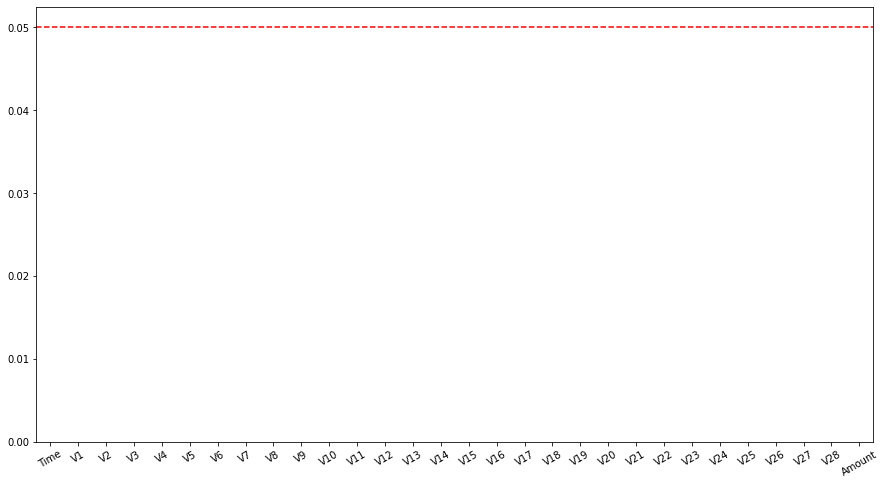

In [11]:
sns.barplot(x=feature_names[:-1],y=pvalues,palette=custom_palette)
plt.axhline(0.05,c='red',ls='--')
plt.xticks(rotation=30)
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [12]:
idx = np.where(pvalues<=0.05)[0]
print(', '.join(list(map(str,idx))))

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29


Neste caso o F-Test não filtra nenhuma variável, assim terá o mesmo resultado que treinar o modelo com todas as variáveis.

## Filtro de Informação Mutua

Neste filtro utilizaremos a informação mútua para encontrar as variáveis com mutual_information maior que 0.1

In [13]:
from sklearn.feature_selection import mutual_info_classif


mi = mutual_info_classif(X_train_sc,y_train.ravel())

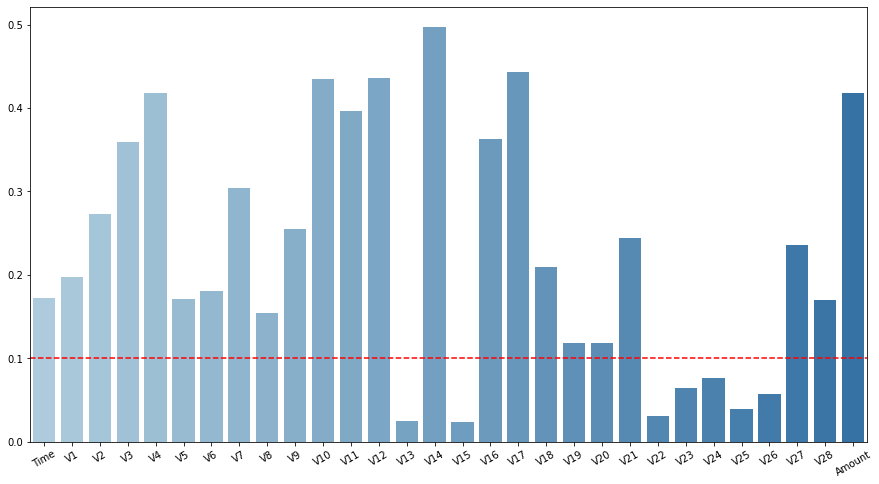

In [14]:
sns.barplot(x=feature_names[:-1],y=mi,palette=custom_palette)
plt.axhline(0.10,c='r',ls='--')
plt.xticks(rotation=30)
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [15]:
idx = np.where(mi>=0.10)[0]
print(', '.join(list(map(str,idx))))

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 27, 28, 29


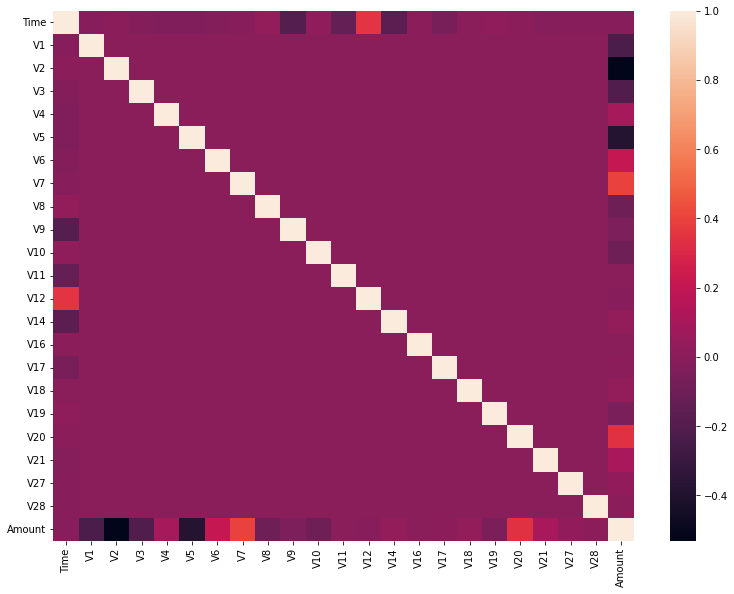

Selected Features:
Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V14, V16, V17, V18, V19, V20, V21, V27, V28, Amount


In [16]:
# Features selected
features_selected = idx
feature_names_selected = feature_names[features_selected]

df_features = dataset.iloc[:,features_selected]

# Verificando as correlações
fig = plt.figure(figsize=(6.5*2,6.5*1.5))
fig.patch.set_alpha(1.0)
sns.heatmap(df_features.corr())
fig.savefig('figures/part2/correlation_mutual_info.pdf', bbox_inches='tight')
fig.savefig('figures/part2/correlation_mutual_info.png', bbox_inches='tight')
plt.show()

X_train_features = X_train[:,features_selected]
X_test_features = X_test[:,features_selected]


X_train_sc_features = X_train_sc[:,features_selected]
X_test_sc_features = X_test_sc[:,features_selected]

print('Selected Features:')
print(', '.join(feature_names_selected))

In [17]:
# Espaço das distribuições de parâmetros
space = {}

# Modelos utilizados
models = {}


sgd = SGDClassifier

# Distribuição SVM
distributions = dict(loss=('hinge',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD SVM':distributions})

models.update({'SGD SVM':sgd})




# Distribuição Logistica
distributions = dict(loss=('log',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD LR':distributions})

models.update({'SGD LR':sgd})









# Nomes dos classificadores
classifiers_names = list(models.keys())




# Dicionarios de modelos, resultados e parâmetros
Best_model = {}
Results = {}
Best_params = {}


np.random.seed(42)
############ Model Loop ################
for s in tqdm(classifiers_names):
    print(s)
    # Classificador
    clf = models[s]
    # RandomizedSearchCV
    randomized_search = RandomizedSearchCV(clf(),param_distributions=space[s],n_iter=15,random_state=42,scoring='balanced_accuracy')
    # Encontrando os melhores parâmetros
    randomized_search.fit(X_train_sc_features,y_train.ravel())
    # Melhor desempenho na validação cruzada
    cv_score = randomized_search.best_score_
    # Melhores hiperparâmetros (segundo a validação cruzada)
    best_params = randomized_search.best_params_
    Best_params.update({s:best_params})
    # Melhor classificador (segundo a validação cruzada)
    best_model_ = randomized_search.best_estimator_
    # Previsão dos dados de teste
    y_pred = best_model_.predict(X_test_sc_features)
    Best_model.update({s:best_model_})
    # Resultados dos dados de teste
    Results.update({f'{s} Test':{'CV_score':cv_score,
                    'Precisão Balanceada':balanced_accuracy_score(y_test.reshape(-1),y_pred.reshape(-1)),
                    'Recall Classe 0':recall_score(y_test.reshape(-1),y_pred.reshape(-1),pos_label=0.),
                    'Recall Classe 1':recall_score(y_test.reshape(-1),y_pred.reshape(-1),pos_label=1.),
                    'Classification Report':classification_report(y_test.reshape(-1),y_pred.reshape(-1),digits=4,output_dict=True),
                    'Matriz de Confusão':confusion_matrix(y_test.reshape(-1),y_pred.reshape(-1),labels=[0.,1.]).tolist()}})
np.random.seed(None)
np.random.seed(None)

with open("performance/performance_supervised_mutual_info.json","w",encoding='utf-8') as f:
    json.dump(Results,f)
with open("performance/hyperparams_mutual_info.json","w",encoding='utf-8') as f:
    json.dump(Best_params,f)

  0%|          | 0/2 [00:00<?, ?it/s]

SGD SVM


 50%|█████     | 1/2 [00:58<00:58, 58.94s/it]

SGD LR


100%|██████████| 2/2 [01:56<00:00, 58.04s/it]



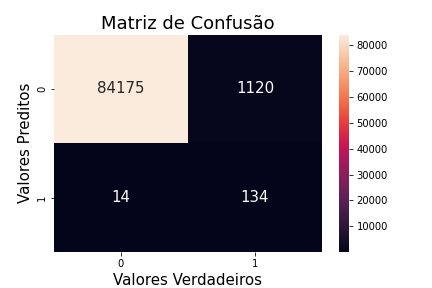
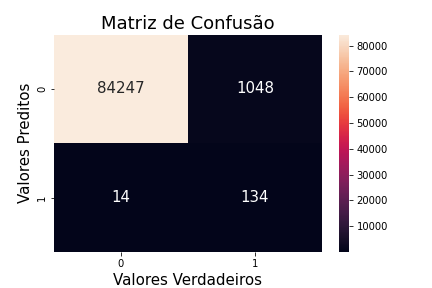

In [18]:
from IPython.core.display import HTML
import base64
from io import BytesIO
html = '''
<h1>Desempenho dos Modelos</h1>
'''

for model in models.keys():
    # Melhor modelo
    best_model_ = Best_model[model]
    html += f'<h2>{model}</h2>'

    # Apresentando o desempenho nos dados de validação e teste
    val_test = ('Test',)
    n_cols = len(val_test)
    for sufix in val_test:
      html += '\n<div>\n'
      html += f'<h3>{sufix}:</h3>\n'
      results_dict = Results[f"{model} {sufix}"]
      html += '<p>Precisão Balanceada: {:1.4f}</p>\n'.format(results_dict['Precisão Balanceada'])
      html += '<p>Recall Classe 0: {:1.4f}</p>\n'.format(results_dict['Recall Classe 0'])
      html += '<p>Recall Classe 1: {:1.4f}</p>\n'.format(results_dict['Recall Classe 1'])
      html += '<p>Matriz de Confusão:</p>\n'

      fig = plt.figure()
      ax = plt.gca()
      sns.heatmap(np.array(results_dict['Matriz de Confusão']),annot=True,fmt='d',ax=ax,annot_kws={"size":15})
      ax.set_title('Matriz de Confusão',fontsize=18)
      ax.set_xlabel('Valores Verdadeiros',fontsize=15)
      ax.set_ylabel('Valores Preditos',fontsize=15)
      fig.patch.set_alpha(1.0)
      
      tmpfile = BytesIO()
      fig.savefig(tmpfile)
      encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
      html += '\n<img src=\'data:image/png;base64,{}\'>\n'.format(encoded)
      html += '\n</div>\n'
plt.close("all")
display(HTML(html))
with open('performance/html_performance_mutual_info.html','w',encoding='utf-8') as f:
  f.write(html)

## Forward Selection


Podemos ver que nos dados de validação e teste os modelos SVM e de Regressão Logística tiveram desempenhos similares. Testando os dois modelos, o modelo que apresentou os melhores resultados de seleção via Forward Selection com métrica ``'balanced_accuracy'`` foi o modelo de regressão logística, que será a única seleção mostrada neste notebook.

In [19]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

best_model_ = Best_model['SGD LR']


# Selecionando as melhores variáveis
# Forward Selection
sfs1 = sfs(best_model_,k_features=7,forward=True,verbose=12,scoring='balanced_accuracy',n_jobs=-1)
X_train_sc_features = sfs1.fit_transform(X_train_sc,y_train.ravel())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

In [20]:
# Performance (cross-validation) for each number of features
feature_selection = pd.DataFrame(sfs1.subsets_).T
feature_selection

,feature_idx,cv_scores,avg_score,feature_names
1,"(14,)","[0.9251205908953875, 0.9259496533011757, 0.924...",0.924819,"(14,)"
2,"(4, 14)","[0.9363883026831474, 0.9377951964626671, 0.937...",0.936841,"(4, 14)"
3,"(4, 12, 14)","[0.9421540548688574, 0.9434730177871571, 0.941...",0.942353,"(4, 12, 14)"
4,"(4, 8, 12, 14)","[0.9431212943422771, 0.9442895186413426, 0.943...",0.943357,"(4, 8, 12, 14)"
5,"(4, 8, 10, 12, 14)","[0.943736810370817, 0.9451060194955281, 0.9436...",0.944089,"(4, 8, 10, 12, 14)"
6,"(3, 4, 8, 10, 12, 14)","[0.9442015877801226, 0.9453446889759822, 0.944...",0.944596,"(3, 4, 8, 10, 12, 14)"
7,"(3, 4, 8, 10, 12, 14, 26)","[0.9443272032961512, 0.9455331122500251, 0.944...",0.944918,"(3, 4, 8, 10, 12, 14, 26)"


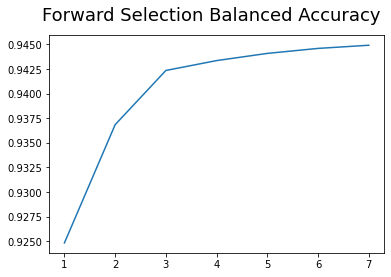

In [21]:
# Features plot cross-validation average score
fig = plt.figure()
plt.plot(feature_selection['avg_score'])
fig.suptitle("Forward Selection Balanced Accuracy",fontsize=18)
plt.show()

In [22]:
feature_selection['avg_score'] = feature_selection['avg_score'].astype(float)
feature_selection['avg_score']

1    0.924819
2    0.936841
3    0.942353
4    0.943357
5    0.944089
6    0.944596
7    0.944918
Name: avg_score, dtype: float64

Neste caso, vemos que os valores onde o desempenho do Forward Selection começa a estagnar é entre 3 e 5 variáveis. Assim iremos escolher 4 variáveis.


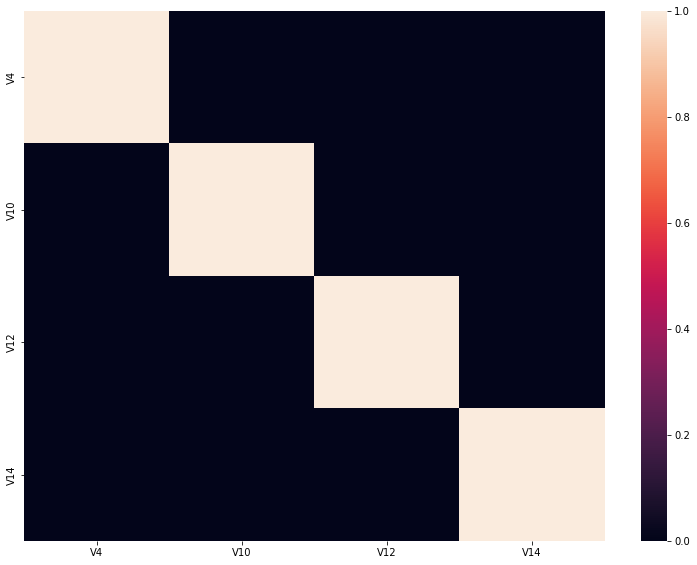

Selected Features:
V4, V10, V12, V14


In [23]:
features_selected = [4, 10, 12, 14]
feature_names_selected = feature_names[features_selected]

df_features = dataset.iloc[:,features_selected]

# Verificando as correlações
fig = plt.figure(figsize=(6.5*2,6.5*1.5))
fig.patch.set_alpha(1.0)
sns.heatmap(df_features.corr())
fig.savefig('figures/part2/correlation_forward_selection.pdf', bbox_inches='tight')
fig.savefig('figures/part2/correlation_forward_selection.png', bbox_inches='tight')
plt.show()

X_train_features = X_train[:,features_selected]
X_test_features = X_test[:,features_selected]


X_train_sc_features = X_train_sc[:,features_selected]
X_test_sc_features = X_test_sc[:,features_selected]

print('Selected Features:')
print(', '.join(feature_names_selected))

In [24]:
# Espaço das distribuições de parâmetros
space = {}

# Modelos utilizados
models = {}


sgd = SGDClassifier

# Distribuição SVM
distributions = dict(loss=('hinge',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD SVM':distributions})

models.update({'SGD SVM':sgd})




# Distribuição Logistica
distributions = dict(loss=('log',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD LR':distributions})

models.update({'SGD LR':sgd})









# Nomes dos classificadores
classifiers_names = list(models.keys())




# Dicionarios de modelos, resultados e parâmetros
Best_model = {}
Results = {}
Best_params = {}


np.random.seed(42)
############ Model Loop ################
for s in tqdm(classifiers_names):
    print(s)
    # Classificador
    clf = models[s]
    # RandomizedSearchCV
    randomized_search = RandomizedSearchCV(clf(),param_distributions=space[s],n_iter=15,random_state=42,scoring='balanced_accuracy')
    # Encontrando os melhores parâmetros
    randomized_search.fit(X_train_sc_features,y_train.ravel())
    # Melhor desempenho na validação cruzada
    cv_score = randomized_search.best_score_
    # Melhores hiperparâmetros (segundo a validação cruzada)
    best_params = randomized_search.best_params_
    Best_params.update({s:best_params})
    # Melhor classificador (segundo a validação cruzada)
    best_model_ = randomized_search.best_estimator_
    # Previsão dos dados de teste
    y_pred = best_model_.predict(X_test_sc_features)
    Best_model.update({s:best_model_})
    # Resultados dos dados de teste
    Results.update({f'{s} Test':{'CV_score':cv_score,
                    'Precisão Balanceada':balanced_accuracy_score(y_test.reshape(-1),y_pred.reshape(-1)),
                    'Recall Classe 0':recall_score(y_test.reshape(-1),y_pred.reshape(-1),pos_label=0.),
                    'Recall Classe 1':recall_score(y_test.reshape(-1),y_pred.reshape(-1),pos_label=1.),
                    'Classification Report':classification_report(y_test.reshape(-1),y_pred.reshape(-1),digits=4,output_dict=True),
                    'Matriz de Confusão':confusion_matrix(y_test.reshape(-1),y_pred.reshape(-1),labels=[0.,1.]).tolist()}})
np.random.seed(None)

with open("performance/performance_supervised_forward_selection.json","w",encoding='utf-8') as f:
    json.dump(Results,f)
with open("performance/hyperparams_forward_selection.json","w",encoding='utf-8') as f:
    json.dump(Best_params,f)

  0%|          | 0/2 [00:00<?, ?it/s]

SGD SVM


 50%|█████     | 1/2 [00:37<00:37, 37.75s/it]

SGD LR


100%|██████████| 2/2 [01:18<00:00, 39.19s/it]



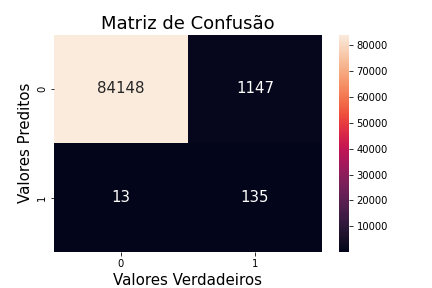
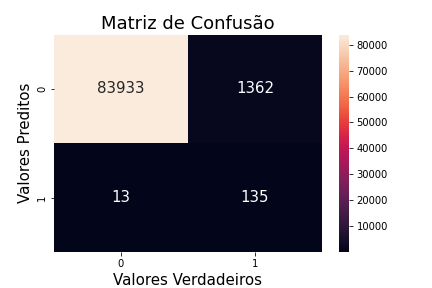

In [25]:
from IPython.core.display import HTML
import base64
from io import BytesIO
html = '''
<h1>Desempenho dos Modelos</h1>
'''

for model in models.keys():
    # Melhor modelo
    best_model_ = Best_model[model]
    html += f'<h2>{model}</h2>'

    # Apresentando o desempenho nos dados de validação e teste
    val_test = ('Test',)
    n_cols = len(val_test)
    for sufix in val_test:
      html += '\n<div>\n'
      html += f'<h3>{sufix}:</h3>\n'
      results_dict = Results[f"{model} {sufix}"]
      html += '<p>Precisão Balanceada: {:1.4f}</p>\n'.format(results_dict['Precisão Balanceada'])
      html += '<p>Recall Classe 0: {:1.4f}</p>\n'.format(results_dict['Recall Classe 0'])
      html += '<p>Recall Classe 1: {:1.4f}</p>\n'.format(results_dict['Recall Classe 1'])
      html += '<p>Matriz de Confusão:</p>\n'

      fig = plt.figure()
      ax = plt.gca()
      sns.heatmap(np.array(results_dict['Matriz de Confusão']),annot=True,fmt='d',ax=ax,annot_kws={"size":15})
      ax.set_title('Matriz de Confusão',fontsize=18)
      ax.set_xlabel('Valores Verdadeiros',fontsize=15)
      ax.set_ylabel('Valores Preditos',fontsize=15)
      fig.patch.set_alpha(1.0)
      
      tmpfile = BytesIO()
      fig.savefig(tmpfile)
      encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
      html += '\n<img src=\'data:image/png;base64,{}\'>\n'.format(encoded)
      html += '\n</div>\n'
plt.close("all")
display(HTML(html))
with open('performance/html_performance_forward_selection.html','w',encoding='utf-8') as f:
  f.write(html)

### Conclusões para os filtros

Os filtros podem trazer melhorias para a performance do modelo. O filtro de mutual information trouxe um desempenho levemente melhor que o modelo base no modelo, filtrando algumas variáveis. Já o Forward Selection obteve 